In [528]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import datetime
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


In [819]:
# Import the Data CSV Files and clean the data


sp500 = pd.read_csv ("S&P 500 from 1989 - Now Yahoo FInance.csv")
ten_yr_bond= pd.read_csv("^TNX 10 year yield from 1989.csv")
gold=pd.read_csv("GOLDFILE FOR PROJECT.csv")
vix=pd.read_csv("VIX Data from 1990.csv")

# S&P sector data w/o XLC & XLRE sectors
materials=pd.read_csv("11 S&P Funds/XLB 1998.csv")
energy_=pd.read_csv("11 S&P Funds/XLE 1998-Now.csv")
financials= pd.read_csv("11 S&P Funds/XLF 1998.csv")
industrial=pd.read_csv("11 S&P Funds/XLI 1998.csv")
tech=pd.read_csv("11 S&P Funds/XLK From 1998.csv")
consumerstaple=pd.read_csv("11 S&P Funds/XLP from 1998.csv")
utilities=pd.read_csv("11 S&P Funds/XLU From 1998.csv")
health=pd.read_csv("11 S&P Funds/XLV From 1998- Now.csv")
consumerdiscretionary=pd.read_csv("11 S&P Funds/XLY from 1998.csv")


In [820]:
# Make Comparitive Line Chart for comparing the following: 
# Year over year % change in price of gold vs S&P 500 from 1990-2020
# Year over Year Change in VIX vs S&P 500 from 1990-2020
# Year over Year % change in S&P 500 and 10 Yr Treasure Rate
pd.options.display.float_format = '{:,.2f}'.format


In [821]:
#Clean the following DFs: SP500, VIX, Ten Year Treasury, Gold.  Merge all 4 of these DFs and then pull data from 

#Prior to Merging Data change column headers
vix=vix.rename(columns={"Open":"VIX Open", "Close": "VIX Close"})
ten_yr_bond=ten_yr_bond.rename(columns={"Open":"10_Yr_Bond_Open", "Close": "10 Yr Bond Close"})
gold=gold.rename(columns={"date":"Date","price":"Gold Close Price"})
SP500=SP500.rename(columns={"Open":"S&P 500 Open", "Close*": "S&P 500 Close"})

# Merge the Data for column header

Merged_df =SP500.merge(vix, how="inner", on="Date")
Merged_df=Merged_df.merge(gold, how="inner", on="Date")
Merged_df=Merged_df.merge(ten_yr_bond, how="inner", on="Date")

Merged_df['Date']=pd.to_datetime(Merged_df['Date'], format='%m/%d/%Y')
Merged_df['Year'] = Merged_df['Date'].dt.year
Merged_df['Month'] = Merged_df['Date'].dt.month
Merged_df['Day'] = Merged_df['Date'].dt.day



Merged_df

jan_merge=Merged_df.loc[(Merged_df['Month'] == 1)]

jan_merge = jan_merge.reset_index(drop=True)

# jan_merge[['S&P 500 Open','S&P 500 Close','VIX Open','VIX Close','Gold Close Price','10 Yr Bond Open','10 Yr Bond Close']]=jan_merge[['S&P 500 Open','S&P 500 Close','VIX Open','VIX Close','Gold Close Price','10 Yr Bond Open','10 Yr Bond Close']].astype("int64")

#jan_merge['S&P 500 Open']=jan_merge['S&P 500 Open'].astype('|S80')

# jan_merge['S&P 500 Open'].astype(str)
# jan_merge['S&P 500 Open'].dtype
# Change all data types from objects to flooats for every column

jan_merge['S&P 500 Open'] = jan_merge['S&P 500 Open'].astype('str')
jan_merge['S&P 500 Open']= jan_merge['S&P 500 Open'].str.replace(',', '')
jan_merge['S&P 500 Open'] = pd.to_numeric(jan_merge['S&P 500 Open'], errors='coerce')

jan_merge['VIX Open'] = jan_merge['VIX Open'].astype('str')
jan_merge['VIX Open']= jan_merge['VIX Open'].str.replace(',', '')
jan_merge['VIX Open'] = pd.to_numeric(jan_merge['VIX Open'], errors='coerce')

jan_merge['S&P 500 Close'] = jan_merge['S&P 500 Close'].astype('str')
jan_merge['S&P 500 Close']= jan_merge['S&P 500 Close'].str.replace(',', '')
jan_merge['S&P 500 Close'] = pd.to_numeric(jan_merge['S&P 500 Close'], errors='coerce')

jan_merge['VIX Close'] = jan_merge['VIX Close'].astype('str')
jan_merge['VIX Close']= jan_merge['VIX Close'].str.replace(',', '')
jan_merge['VIX Close'] = pd.to_numeric(jan_merge['VIX Close'], errors='coerce')

jan_merge['VIX Close'] = jan_merge['VIX Close'].astype('str')
jan_merge['VIX Close']= jan_merge['VIX Close'].str.replace(',', '')
jan_merge['VIX Close'] = pd.to_numeric(jan_merge['VIX Close'], errors='coerce')

jan_merge['Gold Close Price'] = jan_merge['Gold Close Price'].astype('str')
jan_merge['Gold Close Price']= jan_merge['Gold Close Price'].str.replace(',', '')
jan_merge['Gold Close Price'] = pd.to_numeric(jan_merge['Gold Close Price'], errors='coerce')

jan_merge['10_Yr_Bond_Open'] = jan_merge['10_Yr_Bond_Open'].astype('str')
jan_merge['10_Yr_Bond_Open']= jan_merge['10_Yr_Bond_Open'].str.replace(',', '')
jan_merge['10_Yr_Bond_Open'] = pd.to_numeric(jan_merge['10_Yr_Bond_Open'], errors='coerce')

jan_merge['10 Yr Bond Close'] = jan_merge['10 Yr Bond Close'].astype('str')
jan_merge['10 Yr Bond Close']= jan_merge['10 Yr Bond Close'].str.replace(',', '')
jan_merge['10 Yr Bond Close'] = pd.to_numeric(jan_merge['10 Yr Bond Close'], errors='coerce')



jan_merge

,Date,S&P 500 Open,S&P 500 Close,VIX Open,VIX Close,Gold Close Price,10_Yr_Bond_Open,10 Yr Bond Close,Year,Month,Day
0,1990-01-01,353.40,329.08,18.19,18.19,410.12,7.94,8.43,1990,1,1
1,1991-01-01,330.20,343.93,26.62,20.91,384.59,7.97,8.03,1991,1,1
2,1992-01-01,417.03,408.78,19.69,17.40,354.44,6.78,7.31,1992,1,1
3,1993-01-01,435.70,438.78,12.96,12.42,328.99,6.60,6.39,1993,1,1
4,1994-01-01,466.51,481.61,11.28,10.63,387.11,5.80,5.64,1994,1,1
5,1995-01-01,459.21,470.42,14.09,11.96,378.74,7.82,7.59,1995,1,1
6,1996-01-01,615.93,636.02,13.39,12.53,398.69,5.58,5.58,1996,1,1
7,1997-01-01,740.74,786.16,21.54,19.47,355.02,6.41,6.50,1997,1,1
8,1998-01-01,970.43,980.28,24.34,21.47,289.26,5.73,5.51,1998,1,1
9,1999-01-01,"1,229.23","1,279.64",25.38,26.25,287.33,4.64,4.65,1999,1,1


In [822]:
jan_merge

,Date,S&P 500 Open,S&P 500 Close,VIX Open,VIX Close,Gold Close Price,10_Yr_Bond_Open,10 Yr Bond Close,Year,Month,Day
0,1990-01-01,353.40,329.08,18.19,18.19,410.12,7.94,8.43,1990,1,1
1,1991-01-01,330.20,343.93,26.62,20.91,384.59,7.97,8.03,1991,1,1
2,1992-01-01,417.03,408.78,19.69,17.40,354.44,6.78,7.31,1992,1,1
3,1993-01-01,435.70,438.78,12.96,12.42,328.99,6.60,6.39,1993,1,1
4,1994-01-01,466.51,481.61,11.28,10.63,387.11,5.80,5.64,1994,1,1
5,1995-01-01,459.21,470.42,14.09,11.96,378.74,7.82,7.59,1995,1,1
6,1996-01-01,615.93,636.02,13.39,12.53,398.69,5.58,5.58,1996,1,1
7,1997-01-01,740.74,786.16,21.54,19.47,355.02,6.41,6.50,1997,1,1
8,1998-01-01,970.43,980.28,24.34,21.47,289.26,5.73,5.51,1998,1,1
9,1999-01-01,"1,229.23","1,279.64",25.38,26.25,287.33,4.64,4.65,1999,1,1


In [823]:
ten_year_rates=jan_merge['10_Yr_Bond_Open']
ten_year_rates

0    7.94
1    7.97
2    6.78
3    6.60
4    5.80
5    7.82
6    5.58
7    6.41
8    5.73
9    4.64
10   6.50
11   5.08
12   5.07
13   3.88
14   4.27
15   4.26
16   4.42
17   4.66
18   4.03
19   2.20
20   3.86
21   3.38
22   1.95
23   1.84
24   3.03
25   2.20
26   2.23
27   2.51
28   2.43
29   2.65
30   1.90
31   0.94
Name: 10_Yr_Bond_Open, dtype: float64

In [824]:
# jan_merge['S&P 500 Open'].dtype

# # jan_merge['S&P 500 Open']=jan_merge['S&P 500 Open'].astype(float)
# jan_merge['S&P 500 Open'].dtype


In [825]:
# Line Graph 1: Create a Line Graph of the year over year performance for S&P vs Gold from 1990-2020

#Get variables to create for loop 

#SP500 Data from 1990-2020
length_column= len(jan_merge)
sp500year=[]
sp500year_change=[]

row=0
open_price = 0

for index, row in jan_merge.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[1])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[1]
        open_year=row[8]
        sp500year_change.append(price_change)
        sp500year.append(open_year)
    else:
        # set first open price here
        open_price=row[1]
        continue

1
Date                1991-01-01 00:00:00
S&P 500 Open                     330.20
S&P 500 Close                    343.93
VIX Open                          26.62
VIX Close                         20.91
Gold Close Price                 384.59
10_Yr_Bond_Open                    7.97
10 Yr Bond Close                   8.03
Year                               1991
Month                                 1
Day                                   1
Name: 1, dtype: object
2
Date                1992-01-01 00:00:00
S&P 500 Open                     417.03
S&P 500 Close                    408.78
VIX Open                          19.69
VIX Close                         17.40
Gold Close Price                 354.44
10_Yr_Bond_Open                    6.78
10 Yr Bond Close                   7.31
Year                               1992
Month                                 1
Day                                   1
Name: 2, dtype: object
3
Date                1993-01-01 00:00:00
S&P 500 Open                

In [826]:
print(sp500year)
print(sp500year_change)

# 

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[-0.06564799094510466, 0.26296184130829797, 0.04476896146560204, 0.0707137938948818, -0.015648110437075327, 0.3412817665120533, 0.20263666325718843, 0.31008181008181, 0.2666859021258618, 0.19526044759727632, -0.10139186659860475, -0.13042687914684767, -0.23365967528395223, 0.26380395990088884, 0.0899345276638607, 0.030010231698461853, 0.13597801792852623, 0.03521787268252439, -0.3848716254419368, 0.23651424711237104, 0.1263344558286164, 0.0009859894085653927, 0.1329218499277125, 0.2942595306375727, 0.1154150368933723, -0.010053912283258071, 0.10468550681974297, 0.19193718161105355, -0.07704575348488857, 0.309940410826174, 0.16024433917779005]


In [827]:
# VIX Year over Year Data

length_column= len(jan_merge)
vixyear=[]
vixyear_change=[]

row=0
open_price = 0

for index, row in jan_merge.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[3])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[3]
        open_year=row[8]
        vixyear_change.append(price_change)
        vixyear.append(open_year)
    else:
        # set first open price here
        open_price=row[3]
        continue

1
Date                1991-01-01 00:00:00
S&P 500 Open                     330.20
S&P 500 Close                    343.93
VIX Open                          26.62
VIX Close                         20.91
Gold Close Price                 384.59
10_Yr_Bond_Open                    7.97
10 Yr Bond Close                   8.03
Year                               1991
Month                                 1
Day                                   1
Name: 1, dtype: object
2
Date                1992-01-01 00:00:00
S&P 500 Open                     417.03
S&P 500 Close                    408.78
VIX Open                          19.69
VIX Close                         17.40
Gold Close Price                 354.44
10_Yr_Bond_Open                    6.78
10 Yr Bond Close                   7.31
Year                               1992
Month                                 1
Day                                   1
Name: 2, dtype: object
3
Date                1993-01-01 00:00:00
S&P 500 Open                

In [828]:
print(vixyear)
print(vixyear_change)

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[0.46344150632215486, -0.26033056873288624, -0.3417979003657744, -0.12962962962962973, 0.24911347517730503, -0.04968062455642294, 0.6086632561613143, 0.12999066248882718, 0.04272797863599021, -0.04018904807679469, 0.14655167707094918, -0.14858571428571432, 0.20857858668719148, -0.3750870215727209, -0.2544543014729566, -0.08513816280806576, -0.007346938775510192, 0.8569078947368419, 0.7528787422497787, -0.4522486380874867, -0.17250917896678972, 0.2792641984802566, -0.3359477413530396, -0.06036745406824146, 0.24022346368715092, 0.26576576576576566, -0.3741103202846975, -0.22174840085287853, 1.5150685844748861, -0.5112563721402915, 0.7117385586924219]


In [829]:


# Gold Data From 1990-2020

length_column= len(jan_merge)
goldyear=[]
goldyear_change=[]

row=0
open_price = 401.65

for index, row in jan_merge.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[5])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[5]
        open_year=row[8]
        goldyear_change.append(price_change)
        goldyear.append(open_year)
    else:
        # set first open price here
        open_price=row[5]
        continue

1
Date                1991-01-01 00:00:00
S&P 500 Open                     330.20
S&P 500 Close                    343.93
VIX Open                          26.62
VIX Close                         20.91
Gold Close Price                 384.59
10_Yr_Bond_Open                    7.97
10 Yr Bond Close                   8.03
Year                               1991
Month                                 1
Day                                   1
Name: 1, dtype: object
2
Date                1992-01-01 00:00:00
S&P 500 Open                     417.03
S&P 500 Close                    408.78
VIX Open                          19.69
VIX Close                         17.40
Gold Close Price                 354.44
10_Yr_Bond_Open                    6.78
10 Yr Bond Close                   7.31
Year                               1992
Month                                 1
Day                                   1
Name: 2, dtype: object
3
Date                1993-01-01 00:00:00
S&P 500 Open                

In [830]:
print(goldyear_change)
print(goldyear)

[-0.06224306175295887, -0.07840797106536562, -0.07178446884627968, 0.17665117494901114, -0.02162692774663536, 0.052693418669370364, -0.10953234928955723, -0.1852292092106189, -0.006675562807677358, -0.009546414787024294, -0.06555395481218577, 0.059526047816375424, 0.2665351144929798, 0.16149289365136307, 0.023124525024427266, 0.2955880965855499, 0.1472772840364521, 0.4083940401553418, -0.03385733466699106, 0.30528280593103163, 0.21517093539959348, 0.21729175471802137, 0.009535081018902864, -0.2564875834835629, 0.005039949544192353, -0.12300803708859055, 0.0885251288042312, 0.11752084437319316, -0.030896400009303555, 0.20829339671577754, 0.22524457475901355]
[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [831]:
# 10 year bond rate change

length_column= len(jan_merge)
ten_year=[]
ten_year_change=[]

row=0
open_price = 0

for index, row in jan_merge.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[6])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[6]
        open_year=row[8]
        ten_year_change.append(price_change)
        ten_year.append(open_year)
    else:
        # set first open price here
        open_price=row[6]
        continue

1
Date                1991-01-01 00:00:00
S&P 500 Open                     330.20
S&P 500 Close                    343.93
VIX Open                          26.62
VIX Close                         20.91
Gold Close Price                 384.59
10_Yr_Bond_Open                    7.97
10 Yr Bond Close                   8.03
Year                               1991
Month                                 1
Day                                   1
Name: 1, dtype: object
2
Date                1992-01-01 00:00:00
S&P 500 Open                     417.03
S&P 500 Close                    408.78
VIX Open                          19.69
VIX Close                         17.40
Gold Close Price                 354.44
10_Yr_Bond_Open                    6.78
10 Yr Bond Close                   7.31
Year                               1992
Month                                 1
Day                                   1
Name: 2, dtype: object
3
Date                1993-01-01 00:00:00
S&P 500 Open                

In [832]:
print(ten_year)
print(ten_year_change)

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[0.0037783375314860653, -0.14930991217063985, -0.02654867256637177, -0.12181818181818173, 0.349551414768806, -0.28624392738430066, 0.14759090094931038, -0.10550959887622915, -0.1907171523294364, 0.4010349288486417, -0.21899045860264696, -0.0017733990147783922, -0.23509672325305958, 0.10245161290322587, -0.003511235955056313, 0.03922950434578358, 0.05289330922242314, -0.13417775869471876, -0.45375650880238044, 0.7517022242396733, -0.12490282456594978, -0.4222682854604678, -0.055868785238339304, 0.6438653637350705, -0.2744385733157199, 0.01502048247610374, 0.12600896860986555, -0.031063321385902145, 0.09001233045622702, -0.2824283559577678, -0.5086705202312138]


In [833]:
annualreturn_df=pd.DataFrame(
{
#     " Year": ten_year,
    "S&P_500_Annual_Change":sp500year_change,
    "VIX_Annual_Change":vixyear_change,
    "Gold_Annual_Change":goldyear_change,
    "10_Year_Rate_Annual_Change": ten_year_change
})



annualreturn_df=annualreturn_df.multiply(100)
annualreturn_df['Year']=jan_merge['Year']

# annualreturn_df['Year'] = annualreturn_df['Year'].astype('str')
# annualreturn_df['Year']= annualreturn_df['Year'].str.replace(',', '')
# annualreturn_df['Year'] = pd.to_numeric(annualreturn_df['Year'], errors='coerce')



annualreturn_df=annualreturn_df.set_index('Year')

In [834]:
annualreturn_df


,S&P_500_Annual_Change,VIX_Annual_Change,Gold_Annual_Change,10_Year_Rate_Annual_Change
Year,,,,
1990,-6.56,46.34,-6.22,0.38
1991,26.30,-26.03,-7.84,-14.93
1992,4.48,-34.18,-7.18,-2.65
1993,7.07,-12.96,17.67,-12.18
1994,-1.56,24.91,-2.16,34.96
1995,34.13,-4.97,5.27,-28.62
1996,20.26,60.87,-10.95,14.76
1997,31.01,13.00,-18.52,-10.55
1998,26.67,4.27,-0.67,-19.07


In [835]:
# Mean Growth for S&p500 and Gold from 1990-2020

meanSP=annualreturn_df['S&P_500_Annual_Change'].mean()
meangold=annualreturn_df['Gold_Annual_Change'].mean()


The r-squared is: 0.0043984948719908365


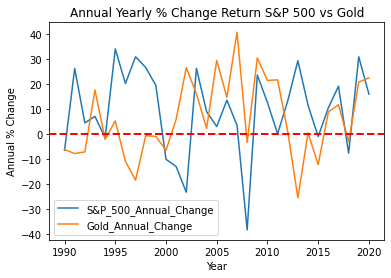

In [836]:
gsp500=annualreturn_df[['S&P_500_Annual_Change','Gold_Annual_Change']]

gsp500.plot()
plt.title('Annual Yearly % Change Return S&P 500 vs Gold')
plt.ylabel('Annual % Change')
plt.axhline(y = 0, color = 'r', linestyle = '--', lw=2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(gsp500['Gold_Annual_Change'], gsp500['S&P_500_Annual_Change'])
regress_values = gsp500['S&P_500_Annual_Change'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")


The r-squared is: 0.21579638042605476


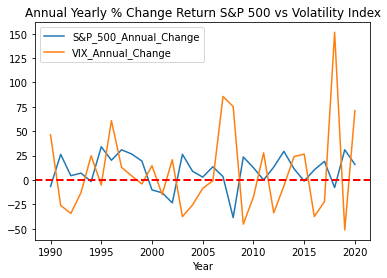

In [837]:
vsp500=annualreturn_df[['S&P_500_Annual_Change','VIX_Annual_Change']]

vsp500.plot()
plt.title('Annual Yearly % Change Return S&P 500 vs Volatility Index')
plt.axhline(y = 0, color = 'r', linestyle = '--', lw=2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(vsp500['VIX_Annual_Change'], vsp500['S&P_500_Annual_Change'])
regress_values = vsp500['S&P_500_Annual_Change'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")



The r-squared is: 0.07028316378001456


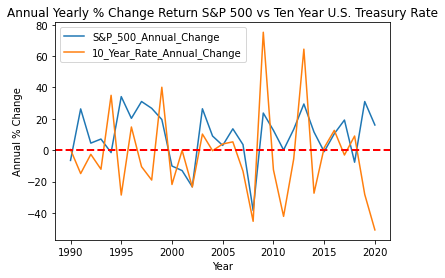

In [838]:
trsp500=annualreturn_df[['S&P_500_Annual_Change','10_Year_Rate_Annual_Change']]

trsp500.plot()
plt.title('Annual Yearly % Change Return S&P 500 vs Ten Year U.S. Treasury Rate')
plt.ylabel('Annual % Change')
plt.axhline(y = 0, color = 'r', linestyle = '--', lw=2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(trsp500['10_Year_Rate_Annual_Change'], trsp500['S&P_500_Annual_Change'])
regress_values = trsp500['S&P_500_Annual_Change'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")



In [839]:
ttrsp500=annualreturn_df['S&P_500_Annual_Change']

ttrsp500=ttrsp500.merge(ten_year_rates, how="outer")

trsp500.plot()
plt.title('Annual Yearly % Change Return S&P 500 vs Ten Year U.S. Treasury Rate')
plt.ylabel('Annual % Change')
plt.axhline(y = 0, color = 'r', linestyle = '--', lw=2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(trsp500['10_Year_Rate_Annual_Change'], trsp500['S&P_500_Annual_Change'])
regress_values = trsp500['S&P_500_Annual_Change'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")

AttributeError: 'Series' object has no attribute 'merge'

In [840]:
meanSP=annualreturn_df['S&P_500_Annual_Change'].mean()
meangold=annualreturn_df['Gold_Annual_Change'].mean()




In [924]:
materials=pd.read_csv("11 S&P Funds/XLB 1998.csv")
energy=pd.read_csv("11 S&P Funds/XLE 1998-Now.csv")
financials= pd.read_csv("11 S&P Funds/XLF 1998.csv")
industrial=pd.read_csv("11 S&P Funds/XLI 1998.csv")
tech=pd.read_csv("11 S&P Funds/XLK From 1998.csv")
consumerstaple=pd.read_csv("11 S&P Funds/XLP from 1998.csv")
utilities=pd.read_csv("11 S&P Funds/XLU From 1998.csv")
health=pd.read_csv("11 S&P Funds/XLV From 1998- Now.csv")
consumerdiscretionary=pd.read_csv("11 S&P Funds/XLY from 1998.csv")

# Rename Colums for Sectors
materials=materials.rename(columns={"Open":"XLB_Open", "Close": "XLB_Close"})
energy=energy.rename(columns={"Open":"XLE_Open", "Close": "XLE_Close"})
financials=financials.rename(columns={"Open":"XLF_Open", "Close": "XLF_Close"})
industrial=industrial.rename(columns={"Open":"XLI_Open", "Close": "XLI_Close"})
tech=tech.rename(columns={"Open":"XLK_Open", "Close": "XLK_Close"})
consumerstaple=consumerstaple.rename(columns={"Open":"XLP_Open", "Close": "XLP_Close"})
utilities=utilities.rename(columns={"Open":"XLU_Open", "Close": "XLU_Close"})
health=health.rename(columns={"Open":"XLV_Open", "Close": "XLV_Close"})
consumerdiscretionary=consumerdiscretionary.rename(columns={"Open":"XLY_Open", "Close": "XLY_Close"})
sp500=sp500.rename(columns={"Open": "sp500_open", "Close*":"SP500_close"})

#Merge All the data for the S&P 500 Sectors

sectors_df=materials
sectors_df=sectors_df.merge(energy, how="inner", on="Date")
sectors_df=sectors_df.merge(industrial, how="inner", on="Date")
sectors_df=sectors_df.merge(tech, how="inner", on="Date")
sectors_df=sectors_df.merge(consumerstaple, how="inner", on="Date")
sectors_df=sectors_df.merge(utilities, how="inner", on="Date")
sectors_df=sectors_df.merge(health, how="inner", on="Date")
sectors_df=sectors_df.merge(financials, how="inner", on="Date")
sectors_df=sectors_df.merge(consumerdiscretionary, how="inner", on="Date")
sectors_df=sectors_df.merge(sp500, how="inner", on="Date")

sectors_df

,Date,XLB_Open,XLB_Close,XLE_Open,XLE_Close,XLI_Open,XLI_Close,XLK_Open,XLK_Close,XLP_Open,...,XLU_Open,XLU_Close,XLV_Open,XLV_Close,XLF_Open,XLF_Close,XLY_Open,XLY_Close,SP500_open,SP500_close
0,1/1/1999,21.94,21.11,23.28,21.81,24.59,24.30,32.66,37.81,27.38,...,30.02,29.48,26.25,27.25,18.81,19.37,26.16,27.47,"1,229.23","1,279.64"
1,2/1/1999,21.28,21.44,21.81,21.62,24.50,24.52,38.16,34.06,26.98,...,29.66,28.67,27.38,27.28,19.45,19.67,27.59,27.30,"1,279.64","1,238.33"
2,3/1/1999,21.28,21.75,21.67,24.59,24.47,24.94,33.62,36.59,26.42,...,28.44,26.69,27.22,28.00,19.60,20.26,27.22,28.59,"1,238.33","1,286.37"
3,4/1/1999,21.78,27.12,24.62,28.23,24.97,28.69,37.50,36.81,26.72,...,26.80,29.27,28.00,29.00,20.21,21.68,28.75,29.34,"1,286.37","1,335.18"
4,5/1/1999,27.22,24.66,28.25,27.62,28.58,28.12,37.00,36.94,25.75,...,29.36,29.61,29.34,28.11,21.60,20.37,29.41,28.02,"1,335.18","1,301.84"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,6/1/2021,88.27,82.31,53.24,53.87,106.14,102.40,139.02,147.66,71.08,...,65.31,63.23,123.75,125.95,38.37,36.69,173.87,178.55,"4,216.52","4,297.50"
270,7/1/2021,82.97,84.02,55.10,49.39,103.00,103.36,147.46,153.40,70.00,...,63.35,65.97,126.04,132.15,36.87,36.52,178.99,180.43,"4,300.73","4,395.26"
271,8/1/2021,84.42,85.61,49.42,48.40,103.76,104.51,154.09,158.86,71.51,...,66.12,68.54,132.67,135.21,36.77,38.40,181.90,183.65,"4,406.86","4,522.68"
272,9/1/2021,85.52,79.11,48.35,52.09,104.73,97.84,159.41,149.32,72.32,...,68.73,63.88,135.32,127.30,38.43,37.53,184.28,179.45,"4,528.80","4,307.54"


In [925]:
sectors_df=sectors_df.drop(columns=['XLB_Close','XLE_Close','XLI_Close','XLK_Close','XLP_Close','XLU_Close','XLV_Close','XLF_Close','XLY_Close','SP500_close'],axis=1)

In [926]:
sectors_df

,Date,XLB_Open,XLE_Open,XLI_Open,XLK_Open,XLP_Open,XLU_Open,XLV_Open,XLF_Open,XLY_Open,SP500_open
0,1/1/1999,21.94,23.28,24.59,32.66,27.38,30.02,26.25,18.81,26.16,"1,229.23"
1,2/1/1999,21.28,21.81,24.50,38.16,26.98,29.66,27.38,19.45,27.59,"1,279.64"
2,3/1/1999,21.28,21.67,24.47,33.62,26.42,28.44,27.22,19.60,27.22,"1,238.33"
3,4/1/1999,21.78,24.62,24.97,37.50,26.72,26.80,28.00,20.21,28.75,"1,286.37"
4,5/1/1999,27.22,28.25,28.58,37.00,25.75,29.36,29.34,21.60,29.41,"1,335.18"
...,...,...,...,...,...,...,...,...,...,...,...
269,6/1/2021,88.27,53.24,106.14,139.02,71.08,65.31,123.75,38.37,173.87,"4,216.52"
270,7/1/2021,82.97,55.10,103.00,147.46,70.00,63.35,126.04,36.87,178.99,"4,300.73"
271,8/1/2021,84.42,49.42,103.76,154.09,71.51,66.12,132.67,36.77,181.90,"4,406.86"
272,9/1/2021,85.52,48.35,104.73,159.41,72.32,68.73,135.32,38.43,184.28,"4,528.80"


In [931]:
# Add month, day, year

sectors_df['Date']=pd.to_datetime(sectors_df['Date'], format='%m/%d/%Y')
sectors_df['Year'] = sectors_df['Date'].dt.year
sectors_df['Month'] = sectors_df['Date'].dt.month
sectors_df['Day'] = sectors_df['Date'].dt.day


# Isolate the months so only January is in 
sectors_df=sectors_df.loc[sectors_df['Month'] == 1]
sectors_df=sectors_df.reset_index(drop=True)
sectors_df

,Date,XLB_Open,XLE_Open,XLI_Open,XLK_Open,XLP_Open,XLU_Open,XLV_Open,XLF_Open,XLY_Open,SP500_open,Month,Day,Year
0,1999-01-01,21.94,23.28,24.59,32.66,27.38,30.02,26.25,18.81,26.16,"1,229.23",1,1,1999
1,2000-01-01,26.67,27.31,29.48,55.62,23.12,28.94,31.00,19.27,31.00,"1,469.25",1,1,2000
2,2001-01-01,21.75,33.75,31.22,31.44,28.62,32.94,27.00,24.04,25.78,"1,320.28",1,1,2001
3,2002-01-01,21.44,26.70,27.60,24.40,25.20,27.90,27.20,21.24,28.85,"1,148.08",1,1,2002
4,2003-01-01,20.04,22.45,20.83,14.90,20.01,19.38,26.75,17.91,23.33,879.82,1,1,2003
5,2004-01-01,26.85,27.81,27.00,20.46,21.75,23.40,30.20,22.89,31.62,"1,111.92",1,1,2004
6,2005-01-01,29.79,36.10,31.25,21.27,23.30,27.80,30.45,24.98,35.45,"1,211.92",1,1,2005
7,2006-01-01,30.11,50.63,31.17,21.00,23.31,31.59,31.78,25.73,32.50,"1,248.29",1,1,2006
8,2007-01-01,34.85,58.31,35.13,23.36,26.07,36.41,33.70,30.02,38.57,"1,418.03",1,1,2007
9,2008-01-01,41.70,79.95,39.05,26.65,28.53,42.15,35.63,23.62,32.99,"1,467.97",1,1,2008


In [932]:
sectors_df['SP500_open'] = sectors_df['SP500_open'].astype('str')
sectors_df['SP500_open']= sectors_df['SP500_open'].str.replace(',', '')
sectors_df['SP500_open'] = pd.to_numeric(sectors_df['SP500_open'], errors='coerce')


sectors_df

,Date,XLB_Open,XLE_Open,XLI_Open,XLK_Open,XLP_Open,XLU_Open,XLV_Open,XLF_Open,XLY_Open,SP500_open,Month,Day,Year
0,1999-01-01,21.94,23.28,24.59,32.66,27.38,30.02,26.25,18.81,26.16,"1,229.23",1,1,1999
1,2000-01-01,26.67,27.31,29.48,55.62,23.12,28.94,31.00,19.27,31.00,"1,469.25",1,1,2000
2,2001-01-01,21.75,33.75,31.22,31.44,28.62,32.94,27.00,24.04,25.78,"1,320.28",1,1,2001
3,2002-01-01,21.44,26.70,27.60,24.40,25.20,27.90,27.20,21.24,28.85,"1,148.08",1,1,2002
4,2003-01-01,20.04,22.45,20.83,14.90,20.01,19.38,26.75,17.91,23.33,879.82,1,1,2003
5,2004-01-01,26.85,27.81,27.00,20.46,21.75,23.40,30.20,22.89,31.62,"1,111.92",1,1,2004
6,2005-01-01,29.79,36.10,31.25,21.27,23.30,27.80,30.45,24.98,35.45,"1,211.92",1,1,2005
7,2006-01-01,30.11,50.63,31.17,21.00,23.31,31.59,31.78,25.73,32.50,"1,248.29",1,1,2006
8,2007-01-01,34.85,58.31,35.13,23.36,26.07,36.41,33.70,30.02,38.57,"1,418.03",1,1,2007
9,2008-01-01,41.70,79.95,39.05,26.65,28.53,42.15,35.63,23.62,32.99,"1,467.97",1,1,2008


In [962]:
#Get variables to create for loop 

#XLB Data from 1990-2020
length_column= len(sectors_df)
xlb_year=[]
xlb_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[1])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[1]
        open_year=row[13]
        xlb_year_change.append(price_change)
        xlb_year.append(open_year)
    else:
        # set first open price here
        open_price=row[1]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [963]:
xlb_year_change

[0.21581196581196582,
 -0.18453427065026362,
 -0.014252827586206954,
 -0.0652985044170473,
 0.33982029242413714,
 0.10949724394785842,
 0.010741859323871802,
 0.15742267826560347,
 0.19655676881244014,
 -0.45083934170649065,
 0.46637563318777303,
 0.1560451961855154,
 -0.11798037094281306,
 0.12178731765260994,
 0.19604267117938048,
 0.05746632689304151,
 -0.12062578754113672,
 0.16643260378200825,
 0.22115182736697458,
 -0.18192275043295816,
 0.24206515150793806,
 0.18114178615100163]

In [1006]:
#Get variables to create for loop 

#XLE Data from 1990-2020
length_column= len(sectors_df)
xle_year=[]
xle_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[2])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[2]
        open_year=row[13]
        xle_year_change.append(price_change)
        xle_year.append(open_year)
    else:
        # set first open price here
        open_price=row[2]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [965]:
xle_year_change

[0.17315436241610738,
 0.23569794050343248,
 -0.20888885925925926,
 -0.15917602400089798,
 0.23875268424264218,
 0.29809418547623817,
 0.40249318019352803,
 0.15168871910549636,
 0.3711198015585696,
 -0.39712316687141336,
 0.2016596846128696,
 0.18957189881118436,
 0.02467338099641853,
 0.03328610575881315,
 0.20603161916511115,
 -0.10513752767205521,
 -0.23586945627323297,
 0.2651263464095745,
 -0.045854657129750925,
 -0.2228036812391759,
 0.07087172343854932,
 -0.3656518756725988]

In [966]:
#Get variables to create for loop 

#XLI Data from 1990-2020
length_column= len(sectors_df)
xli_year=[]
xli_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[3])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[3]
        open_year=row[13]
        xli_year_change.append(price_change)
        xli_year.append(open_year)
    else:
        # set first open price here
        open_price=row[3]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [967]:
#Get variables to create for loop 

#XLI Data from 1990-2020
length_column= len(sectors_df)
xlk_year=[]
xlk_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[4])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[4]
        open_year=row[13]
        xlk_year_change.append(price_change)
        xlk_year.append(open_year)
    else:
        # set first open price here
        open_price=row[4]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [968]:
#Get variables to create for loop 

#XLP Data from 1990-2020
length_column= len(sectors_df)
xlp_year=[]
xlp_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[5])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[5]
        open_year=row[13]
        xlp_year_change.append(price_change)
        xlp_year.append(open_year)
    else:
        # set first open price here
        open_price=row[5]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [969]:
#Get variables to create for loop 

#XLU Data from 1990-2020
length_column= len(sectors_df)
xlu_year=[]
xlu_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[6])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[6]
        open_year=row[13]
        xlu_year_change.append(price_change)
        xlu_year.append(open_year)
    else:
        # set first open price here
        open_price=row[6]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [970]:
#Get variables to create for loop 

#XLV Data from 1990-2020
length_column= len(sectors_df)
xlv_year=[]
xlv_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[7])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[7]
        open_year=row[13]
        xlv_year_change.append(price_change)
        xlv_year.append(open_year)
    else:
        # set first open price here
        open_price=row[7]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [971]:
#Get variables to create for loop 

#XLF Data from 1999-2020
length_column= len(sectors_df)
xlf_year=[]
xlf_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[8])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[8]
        open_year=row[13]
        xlf_year_change.append(price_change)
        xlf_year.append(open_year)
    else:
        # set first open price here
        open_price=row[8]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [972]:
#Get variables to create for loop 

#XLY Data from 1999-2020
length_column= len(sectors_df)
xly_year=[]
xly_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[9])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[9]
        open_year=row[13]
        xly_year_change.append(price_change)
        xly_year.append(open_year)
    else:
        # set first open price here
        open_price=row[9]
        continue
        


1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [973]:
#Get variables to create for loop 

#SP 500 Data from 1999-2020
length_column= len(sectors_df)
sp500_year=[]
sp500_year_change=[]

row=0
open_price = 0

for index, row in sectors_df.iterrows():
    if index != 0:
        # do calculations
        price_change = (float(str(row[10])) - float(str(open_price)))/ float(str(open_price))
        print(index)
        print(row)
        open_price = row[10]
        open_year=row[13]
        sp500_year_change.append(price_change)
        sp500_year.append(open_year)
    else:
        # set first open price here
        open_price=row[10]
        continue

1
Date          2000-01-01 00:00:00
XLB_Open                    26.67
XLE_Open                    27.31
XLI_Open                    29.48
XLK_Open                    55.62
XLP_Open                    23.12
XLU_Open                    28.94
XLV_Open                    31.00
XLF_Open                    19.27
XLY_Open                    31.00
SP500_open               1,469.25
Month                           1
Day                             1
Year                         2000
Name: 1, dtype: object
2
Date          2001-01-01 00:00:00
XLB_Open                    21.75
XLE_Open                    33.75
XLI_Open                    31.22
XLK_Open                    31.44
XLP_Open                    28.62
XLU_Open                    32.94
XLV_Open                    27.00
XLF_Open                    24.04
XLY_Open                    25.78
SP500_open               1,320.28
Month                           1
Day                             1
Year                         2001
Name: 2, dtype: objec

In [997]:
#Make Sector Chasrt
changedf=pd.DataFrame({
    "Materials": xlb_year_change,
    "Energy":xle_year_change,
    "Industrials": xli_year_change,
    "Technology":xlk_year_change,
    "Consumer_Staples":xlp_year_change,
    "Utilities":xlu_year_change,
    "Health_Care":xlv_year_change,
    "Financials":xlf_year_change,
    "Consumer_Discretionary":xly_year_change,
    "SP_500":sp500_year_change
})

changedf['Year']=jan_merge['Year']
changedf=changedf.set_index('Year')
changedf

,Materials,Energy,Industrials,Technology,Consumer_Staples,Utilities,Health_Care,Financials,Consumer_Discretionary,SP_500
Year,,,,,,,,,,
1990,0.22,0.17,0.20,0.70,-0.16,-0.04,0.18,0.02,0.19,0.20
1991,-0.18,0.24,0.06,-0.43,0.24,0.14,-0.13,0.25,-0.17,-0.10
1992,-0.01,-0.21,-0.12,-0.22,-0.12,-0.15,0.01,-0.12,0.12,-0.13
1993,-0.07,-0.16,-0.25,-0.39,-0.21,-0.31,-0.02,-0.16,-0.19,-0.23
1994,0.34,0.24,0.30,0.37,0.09,0.21,0.13,0.28,0.36,0.26
1995,0.11,0.30,0.16,0.04,0.07,0.19,0.01,0.09,0.12,0.09
1996,0.01,0.40,-0.00,-0.01,0.00,0.14,0.04,0.03,-0.08,0.03
1997,0.16,0.15,0.13,0.11,0.12,0.15,0.06,0.17,0.19,0.14
1998,0.20,0.37,0.11,0.14,0.09,0.16,0.06,-0.21,-0.14,0.04


In [1009]:
# Create bar Graph with averages from 1999-2020
mean_sectors=changedf.mean()*100
mean_sectors

Materials                 7.74
Energy                    5.10
Industrials               7.79
Technology               10.84
Consumer_Staples          4.97
Utilities                 4.66
Health_Care               7.70
Financials                4.83
Consumer_Discretionary   10.51
SP_500                    6.75
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Materials'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Industrials'),
  Text(3, 0, 'Technology'),
  Text(4, 0, 'Consumer_Staples'),
  Text(5, 0, 'Utilities'),
  Text(6, 0, 'Health_Care'),
  Text(7, 0, 'Financials'),
  Text(8, 0, 'Consumer_Discretionary'),
  Text(9, 0, 'SP_500')])

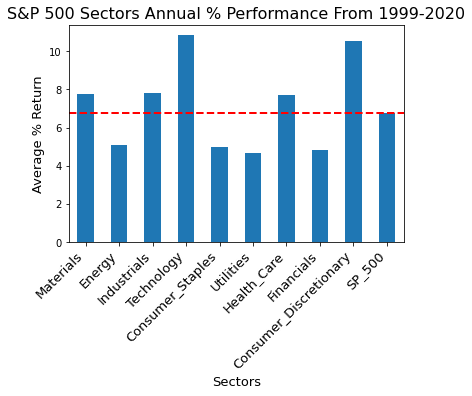

In [1029]:


mean_sectors.plot.bar()
plt.axhline(y = 6.75, color = 'r', linestyle = '--', lw=2)
plt.ylabel('Average % Return', fontsize=13)
plt.xlabel('Sectors', fontsize=13)
plt.title('S&P 500 Sectors Annual % Performance From 1999-2020', fontsize=16)

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize=13,
)
